<h1> <center> LOAN PREDICTION</center></h1>

In [ ]:
#import all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
train=pd.read_csv("train_ctrUa4K.csv")
test=pd.read_csv("test_lAUu6dG.csv")

In [3]:
train.shape

(614, 13)

In [4]:
train.drop(['Loan_ID'],axis=1,inplace=True)
test.drop(['Loan_ID'],axis=1,inplace=True)

In [5]:
test.shape

(367, 11)

In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [9]:
train['Property_Area'].value_counts()
test["Property_Area"].value_counts()

Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64

Distribution analysis
Now that we are familiar with basic data characteristics, let us study distribution of various variables. Let us start with numeric variables – namely ApplicantIncome and LoanAmount

Lets start by plotting the histogram of ApplicantIncome using the following commands:

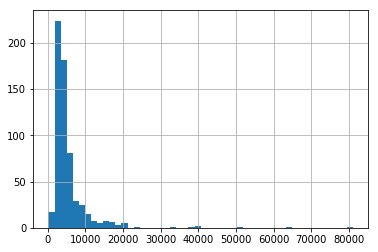

In [10]:
train['ApplicantIncome'].hist(bins=50)

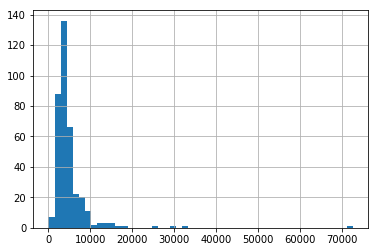

In [11]:
test['ApplicantIncome'].hist(bins=50)

Here we observe that there are few extreme values. This is also the reason why 50 bins are required to depict the distribution clearly.

Next, we look at box plots to understand the distributions. Box plot for fare can be plotted by:

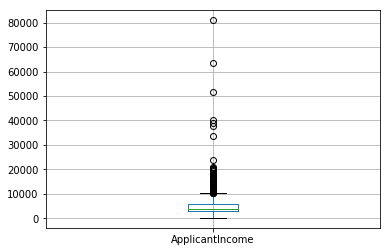

In [12]:
train.boxplot(column='ApplicantIncome')

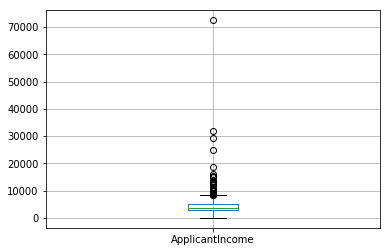

In [13]:
test.boxplot(column='ApplicantIncome')

This confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

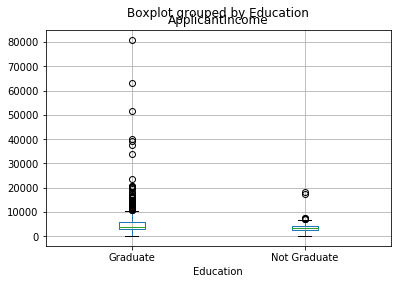

In [14]:
train.boxplot(column='ApplicantIncome', by = 'Education')

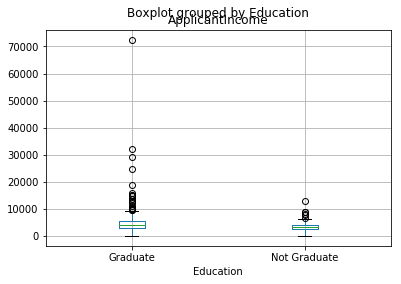

In [15]:
test.boxplot(column='ApplicantIncome', by = 'Education')

We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Now, Let’s look at the histogram and boxplot of LoanAmount using the following command:

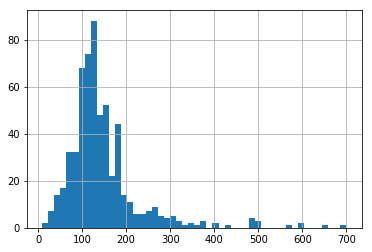

In [16]:
train['LoanAmount'].hist(bins=50)

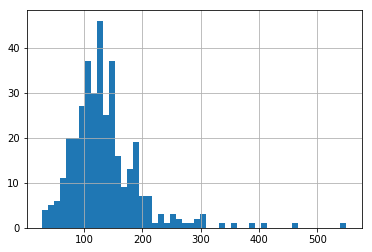

In [17]:
test['LoanAmount'].hist(bins=50)

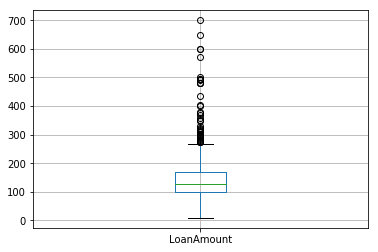

In [18]:
train.boxplot(column='LoanAmount')

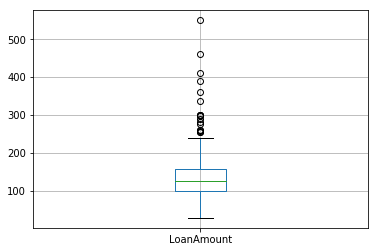

In [19]:
test.boxplot(column='LoanAmount')

Again, there are some extreme values. Clearly, both ApplicantIncome and LoanAmount require some amount of data munging. LoanAmount has missing and well as extreme values values, while ApplicantIncome has a few extreme values, which demand deeper understanding. We will take this up in coming sections.

Categorical variable analysis
Now that we understand distributions for ApplicantIncome and LoanIncome, let us understand categorical variables in more details. We will use Excel style pivot table and cross-tabulation. For instance, let us look at the chances of getting a loan based on credit history. This can be achieved in MS Excel using a pivot table as:



Note: here loan status has been coded as 1 for Yes and 0 for No. So the mean represents the probability of getting loan.

Now we will look at the steps required to generate a similar insight using Python. Please refer to this article for getting a hang of the different data manipulation techniques in Pandas.




In [20]:
temp1 = train['Credit_History'].value_counts(ascending=True)
temp2 = train.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp1)

print ('\nProbility of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


In [21]:
# temp1 = test['Credit_History'].value_counts(ascending=True)
# temp2 = test.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
# print ('Frequency Table for Credit History:') 
# print (temp1)

# print ('\nProbility of getting loan for each Credit History class:')
# print (temp2)

Now we can observe that we get a similar pivot_table like the MS Excel one. This can be plotted as a bar chart using the “matplotlib” library with following code

C:\Users\Rushal\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


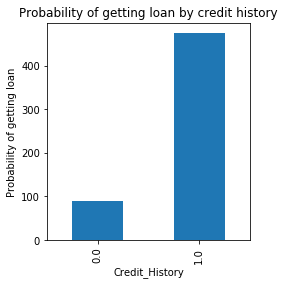

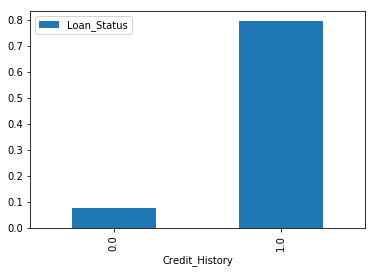

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(121)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
plt.show()

This shows that the chances of getting a loan are eight-fold if the applicant has a valid credit history. You can plot similar graphs by Married, Self-Employed, Property_Area, etc.

Alternately, these two plots can also be visualized by combining them in a stacked chart::

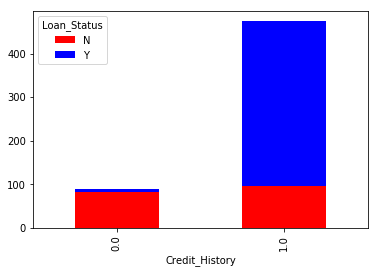

In [23]:
temp3 = pd.crosstab(train['Credit_History'], train['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

# 4. Data Munging in Python : Using Pandas

In [24]:
 train.apply(lambda x: sum(x.isnull()),axis=0) 

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
test.apply(lambda x: sum(x.isnull()),axis=0) 

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [26]:
 train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True)

In [27]:
 test['LoanAmount'].fillna(test['LoanAmount'].mean(), inplace=True)

In [28]:
train["Self_Employed"].value_counts()
test["Self_Employed"].value_counts()



No     307
Yes     37
Name: Self_Employed, dtype: int64

In [29]:
train['Self_Employed'].fillna('No',inplace=True)

In [30]:
test['Self_Employed'].fillna('No',inplace=True)

In [31]:
table = train.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
#train['LoanAmount'].fillna(train[train['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [32]:
table = test.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
#train['LoanAmount'].fillna(train[train['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [33]:
train.apply(lambda x: sum(x.isnull()),axis=0)

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
test.apply(lambda x: sum(x.isnull()),axis=0)

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [35]:
#df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

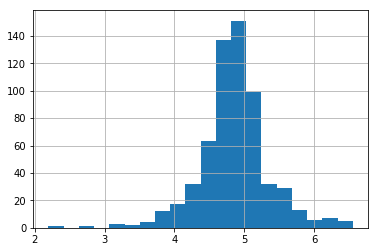

In [36]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

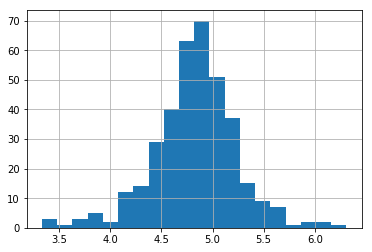

In [37]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])
test['LoanAmount_log'].hist(bins=20)

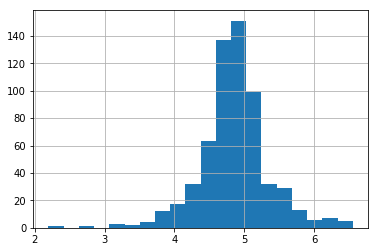

In [38]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['TotalIncome_log'] = np.log(train['TotalIncome'])
train['LoanAmount_log'].hist(bins=20) 

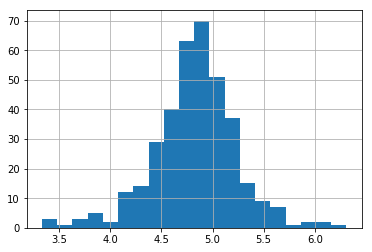

In [39]:
test['TotalIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']
test['TotalIncome_log'] = np.log(test['TotalIncome'])
test['LoanAmount_log'].hist(bins=20) 

In [40]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [41]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].mode()[0], inplace=True)

In [42]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])
train.dtypes 
var_mod1 = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le = LabelEncoder()
for j in var_mod1:
    test[j] = le.fit_transform(test[j])
test.dtypes 

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
LoanAmount_log       float64
TotalIncome            int64
TotalIncome_log      float64
dtype: object

In [43]:
train.shape

(614, 15)

In [44]:
test.shape

(367, 14)

In [45]:
train.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515


In [46]:

x=train.drop(["Loan_Status"],axis=1)

In [47]:
y=train["Loan_Status"]

In [48]:
clf = LogisticRegression()
clf.fit(x,y)
print("LogisticRegression")
print(clf.predict(test))
print(clf.score(x,y))

LogisticRegression
[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
0.8127035830618893


In [49]:
clf1 = DecisionTreeClassifier()
clf1.fit(x,y)
print("DecisionTreeClassifier")
sub1=(clf1.predict(test))
print(clf1.score(x,y))


DecisionTreeClassifier
1.0


In [50]:
import numpy
a = numpy.asarray(sub1)
numpy.savetxt("foo.csv", a)

In [51]:
n=pd.read_csv("foo.csv")

In [52]:
n

,1.000000000000000000e+00
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,0.0
7,1.0
8,1.0
9,1.0


In [53]:
submission=pd.read_csv("sample_submission_49d68Cx.csv")

In [56]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [60]:
#from sklearn.model_selection import train_test_split

In [61]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=20)

In [56]:
#Import models from scikit learn module:
# from sklearn.linear_model import LogisticRegression
# #from sklearn.model_selection import KFold   #For K-fold cross validation
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier, export_graphviz
# from sklearn import metrics

# #Generic function for making a classification model and accessing performance:
# def classification_model(model, data, predictors, outcome):
#   #Fit the model:
#   model.fit(data[predictors],data[outcome])
  
#   #Make predictions on training set:
#   predictions = model.predict(data[predictors])
  
#   #Print accuracy
#   accuracy = metrics.accuracy_score(predictions,data[outcome])
#   print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

#   #Perform k-fold cross-validation with 5 folds
  # KFold(data.shape[0], n_folds=5)
#   error = []
#   for train, test in kf:
#     # Filter training data
#     train_predictors = (data[predictors].iloc[train,:])
    
#     # The target we're using to train the algorithm.
#     train_target = data[outcome].iloc[train]

    
#     # Training the algorithm using the predictors and target.
#     model.fit(train_predictors, train_target)
    
#     #Record error from each cross-validation run
#     error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
#   #print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

#   #Fit the model again so that it can be refered outside the function:
#   model.fit(data[predictors],data[outcome]) 

In [57]:
# predictions

NameError: name 'predictions' is not defined

In [58]:
# outcome_var = 'Loan_Status'
# model = LogisticRegression()
# predictor_var = ['Credit_History']
# classification_model(model, train,predictor_var,outcome_var)

Accuracy : 80.945%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [59]:
#We can try different combination of variables:
#predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
# predictor_var=train
# classification_model(model, train,predictor_var,outcome_var)

ValueError: Must pass DataFrame with boolean values only

In [60]:
#We can try different combination of variables:
# predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
# classification_model(model, train,predictor_var,outcome_var)

Accuracy : 80.945%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [61]:
# model = DecisionTreeClassifier()
# predictor_var = ['Credit_History','Gender','Married','Education']
# classification_model(model, train,predictor_var,outcome_var)

Accuracy : 80.945%


In [62]:
# model = RandomForestClassifier(n_estimators=100)
# predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
#        'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
#         'LoanAmount_log','TotalIncome_log']
# classification_model(model, train,predictor_var,outcome_var)

Accuracy : 100.000%


In [63]:
#Create a series with feature importances:
# featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
# print (featimp)


Credit_History      0.267348
TotalIncome_log     0.264713
LoanAmount_log      0.229944
Dependents          0.051798
Property_Area       0.049287
Loan_Amount_Term    0.042579
Married             0.026795
Education           0.025150
Gender              0.021414
Self_Employed       0.020971
dtype: float64


In [64]:
# model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
# predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
# classification_model(model, train,predictor_var,outcome_var)

Accuracy : 82.410%


In [65]:
#test=pd.read_csv("test_lAUu6dG.csv")

In [66]:
#test.shape

(367, 12)

In [46]:
#test.drop(["Loan_ID"],axis=1,inplace=True)

In [47]:
#test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [48]:
# test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
# test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
# test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
# test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
# test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
# test['LoanAmount'].fillna(test['LoanAmount'].mode()[0], inplace=True)


In [49]:
# from sklearn.preprocessing import LabelEncoder
# var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
# le = LabelEncoder()
# for i in var_mod:
#     test[i] = le.fit_transform(test[i])
# test.dtypes 

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
LoanAmount_log       float64
TotalIncome            int64
TotalIncome_log      float64
dtype: object

In [50]:
#test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [51]:
#test.shape

(367, 14)

In [53]:
#test=test.iloc[:,:14]

In [89]:
#lr.predict(test)

NotFittedError: This LogisticRegression instance is not fitted yet

In [54]:
#from sklearn.tree import DecisionTreeClassifier

In [55]:
#dt_model = DecisionTreeClassifier(random_state=10)

In [62]:
#dt_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [66]:
#dt_model.predict(test)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,

In [65]:
#dt_model.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [76]:
rs=DecisionTreeClassifier()

In [77]:
rs.feature_importances_

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [78]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data

In [80]:
predictions = rf.predict(test)
# Calculate the absolute errors
#errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Mean Absolute Error: 3.83 degrees.

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.